In [1]:
import pandas as pd
data = pd.read_csv("data/train.csv")

In [2]:
len(data)

3947

In [3]:
data

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
5,0,20120620171226Z,"""@SDL OK, but I would hope they'd sign him to ..."
6,0,20120503012628Z,"""Yeah and where are you now?"""
7,1,NaN,"""shut the fuck up. you and the rest of your fa..."
8,1,20120502173553Z,"""Either you are fake or extremely stupid...may..."
9,1,20120620160512Z,"""That you are an idiot who understands neither..."


In [4]:
import numpy as np
y_train = np.array(data.Insult)

In [5]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [6]:
text_train = data.Comment.tolist()

In [7]:
text_train[6]

'"Yeah and where are you now?"'

In [6]:
data_test = pd.read_csv("data/test_with_solutions.csv")

In [9]:
text_test, y_test = data_test.Comment.tolist(), np.array(data_test.Insult)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer()
cv.fit(text_train)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
len(cv.vocabulary_)

16469

In [14]:
cv.vocabulary_.keys()

[u'raining',
 u'hordes',
 u'foul',
 u'four',
 u'prices',
 u'woods',
 u'hanging',
 u'comically',
 u'disobeying',
 u'canes',
 u'hermano',
 u'immature',
 u'meadows',
 u'xa0first',
 u'callin',
 u'shearnut',
 u'doppeltrudy',
 u'u0303a',
 u'xe1ti',
 u'broward',
 u'63e5082f',
 u'screaming',
 u'jrpg',
 u'commenter',
 u'wednesday',
 u'jessup',
 u'asami',
 u'stereotypical',
 u'commented',
 u'specially',
 u'consenting',
 u'melvin',
 u'loathing',
 u'xf6r',
 u'errors',
 u'xa0still',
 u'thunder',
 u'cooking',
 u'allowscriptaccess',
 u'bonuses',
 u'xf6g',
 u'xchg',
 u'misandry',
 u'admiral',
 u'widget',
 u'espumita',
 u'sobs',
 u'brainwashed',
 u'lgbt',
 u'china',
 u'punks',
 u'cult',
 u'sociopaths',
 u'cyclical',
 u'kids',
 u'elaborate',
 u'eastenders',
 u'controversy',
 u'onranker',
 u'oppars',
 u'criticism',
 u'golden',
 u'nwhen',
 u'criticise',
 u'hamas',
 u'nwrongdoing',
 u'hahahahaa',
 u'cocaine',
 u'xa0funny',
 u'opponents',
 u'dna',
 u'dnc',
 u'dnt',
 u'xa3220',
 u'music',
 u'therefore',
 u'm

In [15]:
X_train = cv.transform(text_train)

In [16]:
X_train

<3947x16469 sparse matrix of type '<type 'numpy.int64'>'
	with 100269 stored elements in Compressed Sparse Row format>

In [17]:
text_train[6]

'"Yeah and where are you now?"'

In [18]:
X_train[6, :].nonzero()[1]

array([  806,   983,  9576, 15388, 16367, 16397], dtype=int32)

In [19]:
X_test = cv.transform(text_test)

In [20]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=.01)

In [21]:
svm.fit(X_train, y_train)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [22]:
svm.score(X_train, y_train)

0.88421586014694709

In [23]:
svm.score(X_test, y_test)

0.83679637325273892

In [24]:
coef = svm.coef_.ravel()
positive_coefficients = np.argsort(coef)[-25:]
negative_coefficients = np.argsort(coef)[:25]
interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])


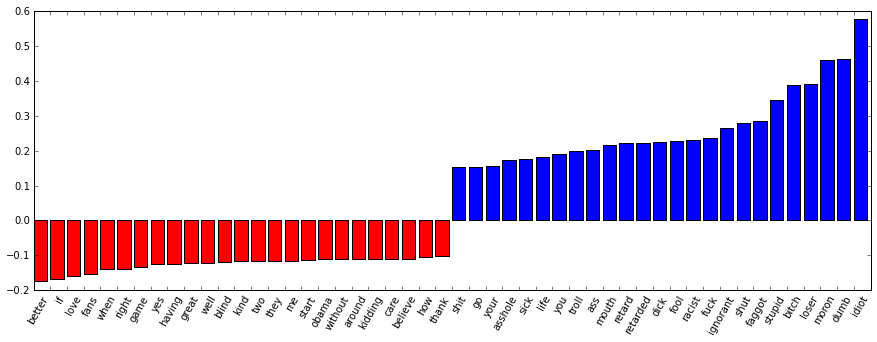

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.bar(np.arange(50), coef[interesting_coefficients], color=["red" if c < 0 else "blue" for c in coef[interesting_coefficients]])
feature_names = np.array(cv.get_feature_names())
plt.xticks(np.arange(1, 51), feature_names[interesting_coefficients], rotation=60, ha="right");

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
pipeline = Pipeline([('vectorizer', cv), ('classifier', svm)])

In [29]:
pipeline.fit(text_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
    ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [30]:
pipeline.score(text_test, y_test)

0.83679637325273892

In [31]:
from sklearn.grid_search import GridSearchCV

In [32]:
param_grid = {'classifier__C': 10. ** np.arange(-3, 3)}
grid_search = GridSearchCV(pipeline, param_grid=param_grid)

In [33]:
grid_search.fit(text_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
    ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'classifier__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [34]:
grid_search.score(text_test, y_test)

0.84132980732905172

In [ ]:
param_grid = {'classifier__C': 10. ** np.arange(-3, 3), "vectorizer__ngram_range": [(1, 1), (1, 2), (1, 3), (2, 3), (2, 2)]}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=3)

In [ ]:
grid_search.fit(text_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_